# Miniptoject: Ads data

Оконные функции и интерактивные графики

Данные взаимодействий с рекламными объявлениями на некоторой площадке за 6 дней. И таблица с характеристиками рекламных клиентов (тех, кто разместил эти объявления).

### Задачи
1) Разберемся с распределением количества показов и кликов. Посчитайте среднее количество показов и среднее количество кликов на объявления за весь период (округлите до целых).

2) Нарисуйте график распределения показов на объявление за весь период.

3) Давайте посчитаем скользящее среднее показов с окном 2. Какое значение скользящего среднего получим за 6 апреля 2019 года (ответ округлите до целых)?

4) Скользящее среднее часто используется для поиска аномалий в данных. Давайте попробуем нанести на один график значения арифметического среднего по дням и скользящего среднего количества показов. В какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? Дни, в которых скользящее среднее равно NaN, не учитываем. 

5) Напишите функцию, которая найдет проблемное объявление (с наибольшим/наименьшим количеством показов) в день, в который была замечена самая большая по модулю аномалия. 

6) Теперь подгрузим данные по рекламным клиентам и найдем среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом.

7) Вычислите конверсию из создания рекламного клиента в запуск первой рекламы в течение не более 365 дней. Ответ дайте в процентах и округлите до сотых. (Фильтровать нужно по значению в формате pd.Timedelta(365, unit='d'))

8) Давайте разобъем наших клиентов по промежуткам от создания до запуска рекламного объявления, равным 30. Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней). Список промежутков для метода pd.cut – [0, 30, 90, 180, 365]

### Описание данных
ads_data.csv – данные взаимодействий с рекламными объявлениями

- date – дата
- time – время
- event – действие (просмотр/клик)
- platform – платформа
- ad_id – id объявления
- client_union_id – id рекламного кабинета
- campaign_union_id – id рекламной кампании
- ad_cost_type – тип оплаты
- ad_cost – цена
- has_video – есть ли видео
- target_audience_count – размер аудитории

ads_clients_data.csv – характеристики рекламных клиентов

- date – дата
- client_union_id – id рекламного кабинета
- community_id – id сообщества
- create_date – дата создания рекламного клиента

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

import plotly.express as px

In [2]:
sns.set(
    font_scale=2,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )

In [3]:
ads_data         = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/shared/homeworks/python_ds_miniprojects/6/ads_data.csv', parse_dates=['date'])
ads_clients_data = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/shared/homeworks/python_ds_miniprojects/6/ads_clients_data.csv', parse_dates=['date', 'create_date'])

In [4]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [5]:
ads_data.ad_id.nunique()

965

In [6]:
ads_data.client_union_id.nunique()

838

In [7]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [8]:
ads_clients_data.client_union_id.nunique()

122078

Посчитаем среднее количество разных рекламных событий (показы и клики) по объявлениям. 

Помните, что некоторые показываемые объявления не кликались, и при группировке в таких случаях не будет строк с кликами, а для подсчёта среднего по объявлениям их нужно учитывать. 

Округлите ответы до целых чисел.

In [9]:
ad_events = ads_data.groupby(['ad_id', 'event'], as_index=False).size()

In [10]:
# делаем сводную табличку по всем типам событий и всем рекламам, заменяя NA на 0
ad_events = ad_events.pivot(index = 'ad_id', columns = 'event', values = 'size').fillna(0)

In [11]:
ad_events.head()

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0


In [12]:
# считаем среднее и округляем
ad_events.mean().round()

event
click    113.0
view     923.0
dtype: float64

Давайте посмотрим на распределение показов объявлений!

По оси x – число показов.
По оси y – доля объявлений с такими показами

Прологарифмируйте число показов, а затем постройте такой график, чтобы можно было понять форму распределения. 

In [13]:
ad_events_view = ad_events.query('view != 0')
ad_events_view

event,click,view
ad_id,,
2,1.0,101.0
3,3.0,184.0
1902,1.0,41.0
2064,0.0,35.0
2132,1.0,58.0
...,...,...
122004,4.0,100.0
122013,0.0,156.0
122023,0.0,68.0


In [14]:
ad_events_view['view_log'] = np.log(ad_events_view.view)

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
ad_events_view.head()

event,click,view,view_log
ad_id,,,
2,1.0,101.0,4.615121
3,3.0,184.0,5.214936
1902,1.0,41.0,3.713572
2064,0.0,35.0,3.555348
2132,1.0,58.0,4.060443


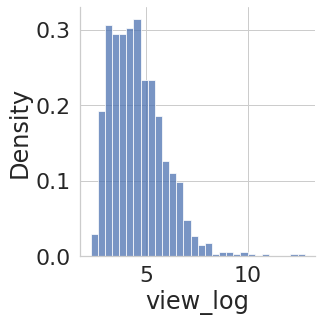

In [16]:
sns.displot(data = ad_events_view.view_log, stat = 'density')

Найти среднее количество показов на 1 объявление (ad_id) по дням, не учитывая объявления, у которых не было показов (обычное среднее). 
После этого посчитайте скользящее среднее по полученному результату с окном в 2 элемента.

In [17]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [18]:
date_roll = ads_data.query('event == "view"') \
    .groupby(['ad_id', 'date'], as_index=False) \
    .agg({'time' : 'count'}) \
    .rename(columns={'time' : 'count'}) \
    .groupby('date') \
    .mean('count') \
    .rolling(2).mean().round()

Какое значение скользящего среднего получим за 6 апреля 2019 года? Округлите ответ до целого числа.

In [19]:
date_roll.query('date == "2019-04-06"')['count']

date
2019-04-06    598.0
Name: count, dtype: float64

Скользящее среднее часто используется для поиска аномалий в данных. 
Давайте попробуем нанести на один график значения просто среднего количества показов по дням и скользящего среднего на основе этих данных (которое мы получили в прошлом задании).

In [20]:
date_mean = ads_data.query('event == "view"') \
    .groupby(['ad_id', 'date'], as_index=False) \
    .agg({'time' : 'count'}) \
    .rename(columns={'time' : 'count'}) \
    .groupby('date') \
    .mean('count')

In [21]:
date_roll

,ad_id,count
date,,
2019-04-01,NaN,NaN
2019-04-02,58784.0,146.0
2019-04-03,59807.0,151.0
2019-04-04,60231.0,420.0
2019-04-05,56994.0,798.0
2019-04-06,54674.0,598.0


In [22]:
date_mean

,ad_id,count
date,,
2019-04-01,59137.900709,154.482270
2019-04-02,58430.781065,137.786982
2019-04-03,61182.561111,163.952778
2019-04-04,59279.457002,675.901720
2019-04-05,54708.533333,919.109677
2019-04-06,54639.813636,277.122727


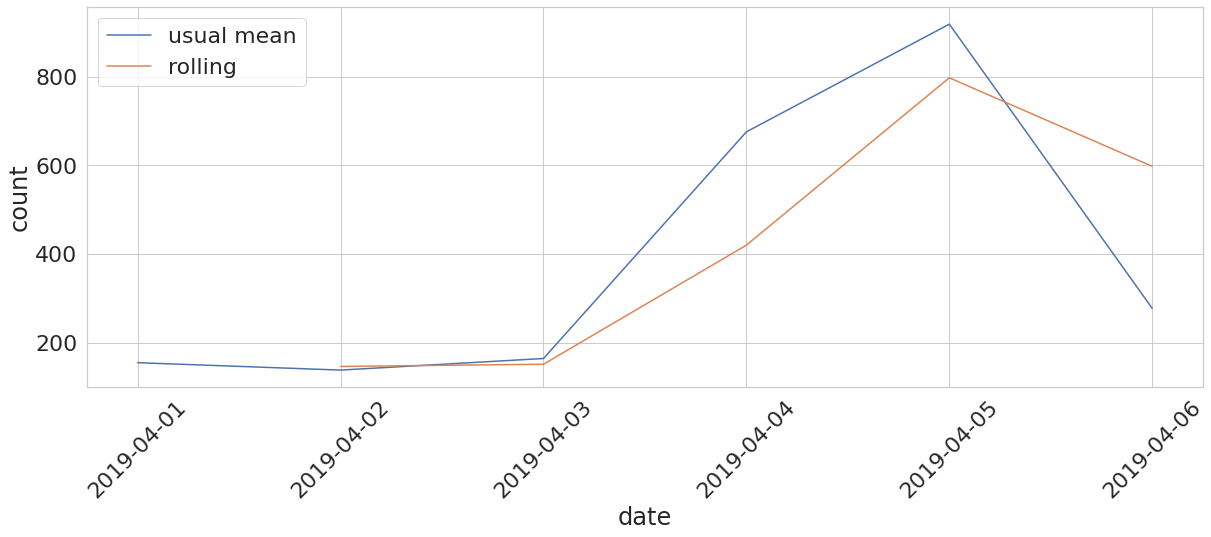

In [23]:
fig, ax = plt.subplots()
sns.lineplot(data=date_mean, x = 'date', y = 'count', ax=ax, label = 'usual mean')
sns.lineplot(data=date_roll, x = 'date', y = 'count', ax=ax, label = 'rolling')
ax.tick_params(axis='x', rotation = 45)
plt.legend()

Посчитайте, в какой день наблюдается наибольшая разница по модулю между арифметическим средним и скользящим средним? 
Дни, в которых скользящее среднее равно NaN, не учитываем. Запишите ответ в формате yyyy-MM-dd

In [24]:
date_mean['mean_diff'] = abs(date_mean['count'] - date_roll['count'])

In [25]:
date_mean

,ad_id,count,mean_diff
date,,,
2019-04-01,59137.900709,154.482270,NaN
2019-04-02,58430.781065,137.786982,8.213018
2019-04-03,61182.561111,163.952778,12.952778
2019-04-04,59279.457002,675.901720,255.901720
2019-04-05,54708.533333,919.109677,121.109677
2019-04-06,54639.813636,277.122727,320.877273


In [26]:
mx = date_mean.mean_diff.max()

In [27]:
date_mean.query('mean_diff == @mx')

,ad_id,count,mean_diff
date,,,
2019-04-06,54639.813636,277.122727,320.877273


Объедините данные рекламы с данными о рекламных клиентах и найдите среднее количество дней от даты создания рекламного клиента и первым запуском рекламного объявления этим клиентом. В качестве ответа укажите среднее число дней.

In [28]:
ads_data.head()

,date,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count
0,2019-04-01,2019-04-01 00:00:48,view,android,45061,34734,45061,CPM,200.6,0,1955269
1,2019-04-01,2019-04-01 00:00:48,view,web,121288,121288,121288,CPM,187.4,0,232011
2,2019-04-01,2019-04-01 00:01:03,view,android,102737,102535,102564,CPC,60.7,0,4410
3,2019-04-01,2019-04-01 00:01:03,view,android,107564,106914,107564,CPM,217.3,0,62711
4,2019-04-01,2019-04-01 00:01:09,view,android,4922,37,4400,CPC,60.1,0,1183501


In [29]:
ads_clients_data.head()

,date,client_union_id,community_id,create_date
0,2020-05-07,1,-130371893,2018-12-24
1,2020-05-07,2,-130304626,2019-02-10
2,2020-05-07,3,-130462599,2019-01-25
3,2020-05-07,4,-130574300,2018-12-09
4,2020-05-07,5,-130292358,2019-01-08


In [30]:
# соединяем 2 df по общей колонке
ads_full = ads_data.merge(ads_clients_data, on='client_union_id', how='right')

In [31]:
# считаем разницу в днях
ads_full['diff_days'] = ads_full.date_x - ads_full.create_date
ads_full.head()

,date_x,time,event,platform,ad_id,client_union_id,campaign_union_id,ad_cost_type,ad_cost,has_video,target_audience_count,date_y,community_id,create_date,diff_days
0,2019-04-01,2019-04-01 00:08:51,view,android,3.0,1,1.0,CPC,46.7,0.0,45035.0,2020-05-07,-130371893,2018-12-24,98 days
1,2019-04-01,2019-04-01 00:09:36,view,ios,3.0,1,1.0,CPC,46.7,0.0,45035.0,2020-05-07,-130371893,2018-12-24,98 days
2,2019-04-01,2019-04-01 00:29:30,view,ios,3.0,1,1.0,CPC,46.7,0.0,45035.0,2020-05-07,-130371893,2018-12-24,98 days
3,2019-04-01,2019-04-01 00:29:58,view,android,3.0,1,1.0,CPC,46.7,0.0,45035.0,2020-05-07,-130371893,2018-12-24,98 days
4,2019-04-01,2019-04-01 00:51:54,view,android,3.0,1,1.0,CPC,46.7,0.0,45035.0,2020-05-07,-130371893,2018-12-24,98 days


In [32]:
# группируем по клиентам, выражаем минимальную разницу подням у каждого клиента, считаем общее среднее
first_ad = ads_full.groupby('client_union_id').diff_days.min()
first_ad.head()

client_union_id
1   98 days
2       NaT
3       NaT
4       NaT
5       NaT
Name: diff_days, dtype: timedelta64[ns]

In [33]:
first_ad.mean().days
# days - считает количество дней

124

Давайте вычислим конверсию из создания рекламного кабинета в запуск первой рекламы в течение не более 365 дней.

Конверсия – отношение числа клиентов, которые совершили целевое действие (создали рекламу), к общему числу клиентов. 

Чтобы отобрать данные за нужный промежуток, можно воспользоваться сравнением времени до создания первой рекламы с pd.Timedelta(365, unit='day')

Ответ дайте в процентах и округлите до сотых.

In [34]:
k = pd.Timedelta(365, unit='day') 

In [35]:
# считаем количество людей, которые не сделали рекламу ad_id = NaN
ads_full.ad_id.isnull().sum()

121240

In [36]:
# считаем количество уникальных пользователей
ads_full.client_union_id.nunique()

122078

In [37]:
# вычитаем из одного другое - получается количество пользователей, которые сделали рекламу
ads_full.client_union_id.nunique() - ads_full.ad_id.isnull().sum()

838

In [38]:
# считаем конверсию - число пользователей, которые сделали рекламу, делим на общее число пользователей, умножаем на 100%
(((ads_full.client_union_id.nunique() - ads_full.ad_id.isnull().sum())/ads_full.client_union_id.nunique())*100).round(2)

0.69

ДРУГОЙ СПОСОБ:

In [39]:
k = pd.Timedelta(365, unit='day') 
first_ad = first_ad.loc[first_ad < k]

In [40]:
np.round((len(first_ad) / ads_full.client_union_id.nunique()*100), 2)

0.69

Давайте разобъем наших клиентов по промежуткам от создания рекламного кабинета до запуска первого рекламного объявления.

Определите, сколько уникальных клиентов запустили свое первое объявление в первый месяц своего существования (от 0 до 30 дней).

Список промежутков дней для метода pd.cut() – [0, 30, 90, 180, 365]. 

Создать временные промежутки можно с помощью pd.to_timedelta().

In [41]:
diff_cut = pd.cut(first_ad, bins = pd.to_timedelta(['0d','30d','90d','180d', '365d']))
diff_cut.head()

client_union_id
1     (90 days 00:00:00, 180 days 00:00:00]
9     (90 days 00:00:00, 180 days 00:00:00]
13     (30 days 00:00:00, 90 days 00:00:00]
16    (90 days 00:00:00, 180 days 00:00:00]
20     (30 days 00:00:00, 90 days 00:00:00]
Name: diff_days, dtype: category
Categories (4, interval[timedelta64[ns]]): [(0 days 00:00:00, 30 days 00:00:00] < (30 days 00:00:00, 90 days 00:00:00] < (90 days 00:00:00, 180 days 00:00:00] < (180 days 00:00:00, 365 days 00:00:00]]

In [42]:
diff_cut.value_counts()

(90 days 00:00:00, 180 days 00:00:00]     396
(30 days 00:00:00, 90 days 00:00:00]      263
(180 days 00:00:00, 365 days 00:00:00]    168
(0 days 00:00:00, 30 days 00:00:00]        11
Name: diff_days, dtype: int64